In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyberguard/test1.csv
/kaggle/input/cyberguard/train1.csv


In [2]:
# CLEANING THE DATASET
# 1. removing all duplicates
df = pd.read_csv('/kaggle/input/cyberguard/train1.csv')
df


,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...
...,...,...,...
93681,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...
93682,Online Financial Fraud,EWallet Related Fraud,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...
93683,Online Financial Fraud,UPI Related Frauds,Cyber Stalking Blackmailing PhoneSMSVOIP C...
93684,Online and Social Media Related Crime,Online Matrimonial Fraud,Call karke bola ki aapka lotary laga ha aru AC...


In [12]:
# df = pd.read_csv('/kaggle/input/cyberguard/train1.csv')
# df = df.groupby('category').apply(lambda x: x.drop_duplicates(subset='crimeaditionalinfo')).reset_index(drop=True)
# df
# THIS REMOVES THE DUPLICATES IN EACH CATEGORY

/tmp/ipykernel_30/3684320887.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('category').apply(lambda x: x.drop_duplicates(subset='crimeaditionalinfo')).reset_index(drop=True)


,category,sub_category,crimeaditionalinfo
0,Any Other Cyber Crime,Other,Details entered in pdf file Person posing as A...
1,Any Other Cyber Crime,Other,Someone changed my email id nd contact number ...
2,Any Other Cyber Crime,Other,Received sms and then I had call the number t...
3,Any Other Cyber Crime,Other,I received call claming to be the SBI Branch m...
4,Any Other Cyber Crime,Other,I ordered dress on th January online shopping...
...,...,...,...
85206,Sexually Obscene material,NaN,My sister is getting WhatsApp video and normal...
85207,Sexually Obscene material,NaN,Hello sir\r\nA stranger anonymously blackmaili...
85208,Sexually Obscene material,NaN,Respected sir\r\n\r\nMy name is Deiveegan and ...
85209,Sexually Obscene material,NaN,I was frauded by the account with my friends i...


In [18]:
df[(df['category'] == 'Any Other Cyber Crime') & (df['sub_category'] == 'Other')]
# ALL OTHER CYBER CRIME ARE OTHER

,category,sub_category,crimeaditionalinfo
0,Any Other Cyber Crime,Other,Details entered in pdf file Person posing as A...
1,Any Other Cyber Crime,Other,Someone changed my email id nd contact number ...
2,Any Other Cyber Crime,Other,Received sms and then I had call the number t...
3,Any Other Cyber Crime,Other,I received call claming to be the SBI Branch m...
4,Any Other Cyber Crime,Other,I ordered dress on th January online shopping...
...,...,...,...
10807,Any Other Cyber Crime,Other,...
10808,Any Other Cyber Crime,Other,I have applied for personal loan rs on payoff...
10809,Any Other Cyber Crime,Other,Sir mera name ajay sharma h or m ek \r\nfroud ...
10810,Any Other Cyber Crime,Other,Myshoppify is a scamming handle claiming to di...


In [8]:
df = df.drop_duplicates(subset='crimeaditionalinfo')
df

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...
...,...,...,...
93681,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...
93682,Online Financial Fraud,EWallet Related Fraud,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...
93683,Online Financial Fraud,UPI Related Frauds,Cyber Stalking Blackmailing PhoneSMSVOIP C...
93684,Online and Social Media Related Crime,Online Matrimonial Fraud,Call karke bola ki aapka lotary laga ha aru AC...


In [6]:
test = pd.read_csv('/kaggle/input/cyberguard/test1.csv')
test

,category,sub_category,crimeaditionalinfo
0,RapeGang Rape RGRSexually Abusive Content,NaN,Sir namaskar mein Ranjit Kumar PatraPaise neh...
1,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT
2,Cyber Attack/ Dependent Crimes,SQL Injection,The issue actually started when I got this ema...
3,Online Financial Fraud,Fraud CallVishing,I am amit kumar from karwi chitrakoot I am tot...
4,Any Other Cyber Crime,Other,I have ordered saree and blouse from rinki s...
...,...,...,...
31224,Online and Social Media Related Crime,Online Matrimonial Fraud,A lady named Rashmi probably a fake name had c...
31225,Online Financial Fraud,Internet Banking Related Fraud,I am Mr Chokhe Ram Two pers mobile number wer...
31226,Any Other Cyber Crime,Other,Mai Bibekbraj maine pahle ki complain kar chuk...
31227,Online Financial Fraud,Internet Banking Related Fraud,received URL link for updating KYC from mobile...


In [4]:
df['category'].value_counts()
# online fin fraud, RGR , 

category
Online Financial Fraud                                  57434
Online and Social Media Related Crime                   12140
Any Other Cyber Crime                                   10878
Cyber Attack/ Dependent Crimes                           3608
RapeGang Rape RGRSexually Abusive Content                2822
Sexually Obscene material                                1838
Hacking  Damage to computercomputer system etc           1710
Sexually Explicit Act                                    1552
Cryptocurrency Crime                                      480
Online Gambling  Betting                                  444
Child Pornography CPChild Sexual Abuse Material CSAM      379
Online Cyber Trafficking                                  183
Cyber Terrorism                                           161
Ransomware                                                 56
Report Unlawful Content                                     1
Name: count, dtype: int64

In [7]:
test.value_counts('category')

category
Online Financial Fraud                                  18896
Online and Social Media Related Crime                    4139
Any Other Cyber Crime                                    3670
Cyber Attack/ Dependent Crimes                           1261
RapeGang Rape RGRSexually Abusive Content                 912
Sexually Obscene material                                 666
Hacking  Damage to computercomputer system etc            592
Sexually Explicit Act                                     535
Cryptocurrency Crime                                      166
Online Gambling  Betting                                  134
Child Pornography CPChild Sexual Abuse Material CSAM      123
Online Cyber Trafficking                                   61
Cyber Terrorism                                            52
Ransomware                                                 18
Crime Against Women & Children                              4
Name: count, dtype: int64

In [15]:
# df['newlines'] = df['crimeaditionalinfo'].str.count('ID')
# df[df['newlines'] > 1].value_counts('category')
# ID string literally identifies 85% of SA content cases

category
RapeGang Rape RGRSexually Abusive Content               2571
Online Financial Fraud                                  1376
Online and Social Media Related Crime                    365
Any Other Cyber Crime                                    255
Hacking  Damage to computercomputer system etc            44
Sexually Obscene material                                 23
Cryptocurrency Crime                                      16
Sexually Explicit Act                                     15
Online Gambling  Betting                                  11
Online Cyber Trafficking                                   6
Child Pornography CPChild Sexual Abuse Material CSAM       2
Cyber Terrorism                                            2
Ransomware                                                 1
Name: count, dtype: int64

In [24]:
df[df['category']=='Ransomware']
# import pandas as pd
# from collections import Counter
# import matplotlib.pyplot as plt

# # Filter the DataFrame to only include rows where the category is 'Ransomware'
# ransomware_df = df[df['category'] == 'Ransomware']

# # Join all the strings in the 'category' column into a single string
# all_text = ' '.join(ransomware_df['crimeaditionalinfo'].values)

# # Split the string into a list of words
# words = all_text.split()

# # Count the occurrences of each word
# word_counts = Counter(words)

# # Get the top 10 most common words
# top_words = word_counts.most_common(100)

# # Create a DataFrame from the top words
# top_words_df = pd.DataFrame(top_words, columns=['word', 'count'])

# # Plot the top words
# plt.figure(figsize=(10, 96))
# plt.barh(top_words_df['word'], top_words_df['count'])
# plt.xlabel('Count')
# plt.ylabel('Word')
# plt.title('Top 10 most common words in Ransomware category')
# plt.gca().invert_yaxis()
# plt.show()



# for RANSOMWARE
# most interesting are files, data, ransomware, encrypted


,category,sub_category,crimeaditionalinfo,newlines
2420,Ransomware,Ransomware,Your outgoing and or incoming call are blocked...,0.0
4466,Ransomware,Ransomware,Dear Sir I purchased product from OLX after m...,0.0
11480,Ransomware,Ransomware,I received this email yesterday since then I h...,0.0
16703,Ransomware,Ransomware,I WAS USING INSTAGRAM WHERE I SAW AN WEBSITE O...,0.0
18939,Ransomware,Ransomware,Unhone pahle hume youTube par notification me ...,0.0
20528,Ransomware,Ransomware,I received a ransomware email on my outlook wo...,1.0
21765,Ransomware,Ransomware,While searching for loan I downloaded koko loa...,0.0
22076,Ransomware,Ransomware,Today i install one namely coinbase To explore...,1.0
24122,Ransomware,Ransomware,This is my company email id and i got this th...,0.0
25055,Ransomware,Ransomware,On WhatsApp call the person made vedio now bla...,0.0


In [10]:
df[df['crimeaditionalinfo'].str.count('Respected Sir') > 0] #value_counts('category')
# LOOKS LIKE THERE IS MAJOR OVERLAP BETWEEN RANSOMWARE, FINANCIAL FRAUD, sOCIAL MEDIA CRIME, OTHER CYBER CRIME
# there is a need for feature enginnering to seperate online financial fraud


,category,sub_category,crimeaditionalinfo
25,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...
77,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...
92,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...
98,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...
117,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...
...,...,...,...
93550,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...
93592,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...
93653,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...
93667,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...


In [13]:
df.iloc[25]['crimeaditionalinfo']

'Respected Sir\r\n\r\nA very serious matter I want to inform you Few person running or involve in some very shamefull activities by using few women at many places of kolkata gariahat ballygunge RUBY HOSPITAL BEHIND area KASBA ANANDAPUR QUEST MALL metropolis mall area ACROPOLISMALL area park circus FORUM MALL ELGIN RD Parkstreet MAIDAN AREA esplanade Garia jadavpur BEHALASAKHERBAZAR JOKA BANSDRONI  Rabindrasadanexide area  HARIDEVPUR triangular park lake mall area rashbehari area TOLLYGUNGE THAKURPUKUR BBD BAG DALHOUSIE AREA  and SALTLAKE\r\n\r\nTheir name \r\nSUBHRO SAHA AMLAN DATTA \r\nIZAZ AHMED Anirban\r\n\r\n\r\nThey officially work in a insurance office hdfclife \xa0a hindustanpark ab gariahat shopping mall st floor beside of reliance trend building near gariahat more  but outside at several places  they involve in some shamefull activities last years\r\n\r\nSir a person SUBHRO SAHA forcefully involve few women employee ex FEMALE employee in such shamefull doing\r\n\r\nAt afternoo

In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch
tokenizer = AutoTokenizer.from_pretrained('l3cube-pune/hing-roberta')



tokenizer_config.json:   0%|          | 0.00/406 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [3]:
df_binary = df.copy()
df_binary['label'] = df_binary['category'].apply(lambda x: 1 if x == "Online Financial Fraud" else 0)
df_binary['length'] = df_binary['crimeaditionalinfo'].str.len()
df_binary

,category,sub_category,crimeaditionalinfo,label,length
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...,0,258.0
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...,1,247.0
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...,0,229.0
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...,0,538.0
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...,1,194.0
...,...,...,...,...,...
93681,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...,1,274.0
93682,Online Financial Fraud,EWallet Related Fraud,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...,1,195.0
93683,Online Financial Fraud,UPI Related Frauds,Cyber Stalking Blackmailing PhoneSMSVOIP C...,1,212.0
93684,Online and Social Media Related Crime,Online Matrimonial Fraud,Call karke bola ki aapka lotary laga ha aru AC...,0,231.0


(array([12009., 38415., 17049.,  8374.,  4303.,  5936.,  1556.,  1108.,
         1046.,  3869.]),
 array([1.0000e+00, 1.5260e+02, 3.0420e+02, 4.5580e+02, 6.0740e+02,
        7.5900e+02, 9.1060e+02, 1.0622e+03, 1.2138e+03, 1.3654e+03,
        1.5170e+03]),
 <BarContainer object of 10 artists>)

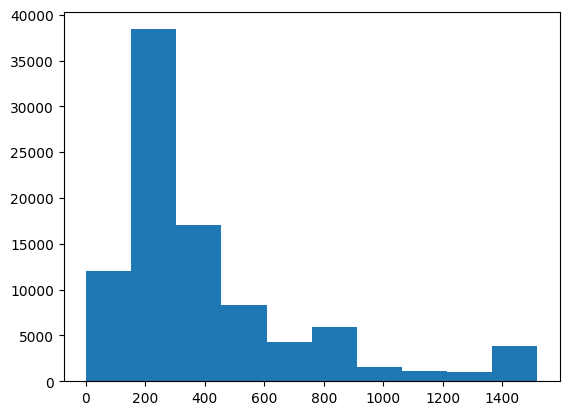

In [35]:
import matplotlib.pyplot as plt
plt.hist(df_binary['length'])

In [10]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_binary['crimeaditionalinfo'], df_binary['label'], test_size=0.2, stratify=df_binary['label']
)

In [12]:
type(train_texts.tolist())

list

In [16]:
train_texts = [str(text) for text in train_texts]
val_texts = [str(text) for text in val_texts]

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)
print('done')

done


In [17]:
 class FraudDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

train_dataset = FraudDataset(train_encodings, train_labels.to_list())
val_dataset = FraudDataset(val_encodings, val_labels.to_list())

In [ ]:
binary_model = AutoModelForSequenceClassification.from_pretrained('l3cube-pune/hing-roberta', num_labels=2)

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=1,
    save_steps=10_000,
    save_total_limit=2,
)

trainer = Trainer(
    model=binary_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

trainer.train()


config.json:   0%|          | 0.00/750 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at l3cube-pune/hing-roberta and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locall

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
